# Extract

A Convolutional Network is used to extract relevant features from the images.

# Setup

Check if extraction done

In [1]:
assert not Path(DIR_DATA / 'COCO/train/features.pt').exists(), 'Extraction done already. Move on!'

## Imports

In [2]:
import magnet as mag

Accelerating your code on shiney new Tesla P100-PCIE-16GB GPU.


In [3]:
import torch

In [4]:
from captioner.data import get_extract_dataloaders
from captioner.extract import Extractor
from captioner.utils import show_coco
from captioner.hparams import image_shape, architecture, num_workers
from captioner.hparams import extractor_batch_size as batch_size

## Preparations

In [5]:
jtplot_style()

In [6]:
DIR_DATA = DIR_DATA / 'COCO'

## Load Data

In [7]:
dataloader = get_extract_dataloaders(DIR_DATA, image_shape, batch_size, num_workers)

loading annotations into memory...
Done (t=1.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.19s)
creating index...
index created!


Take a look at the images

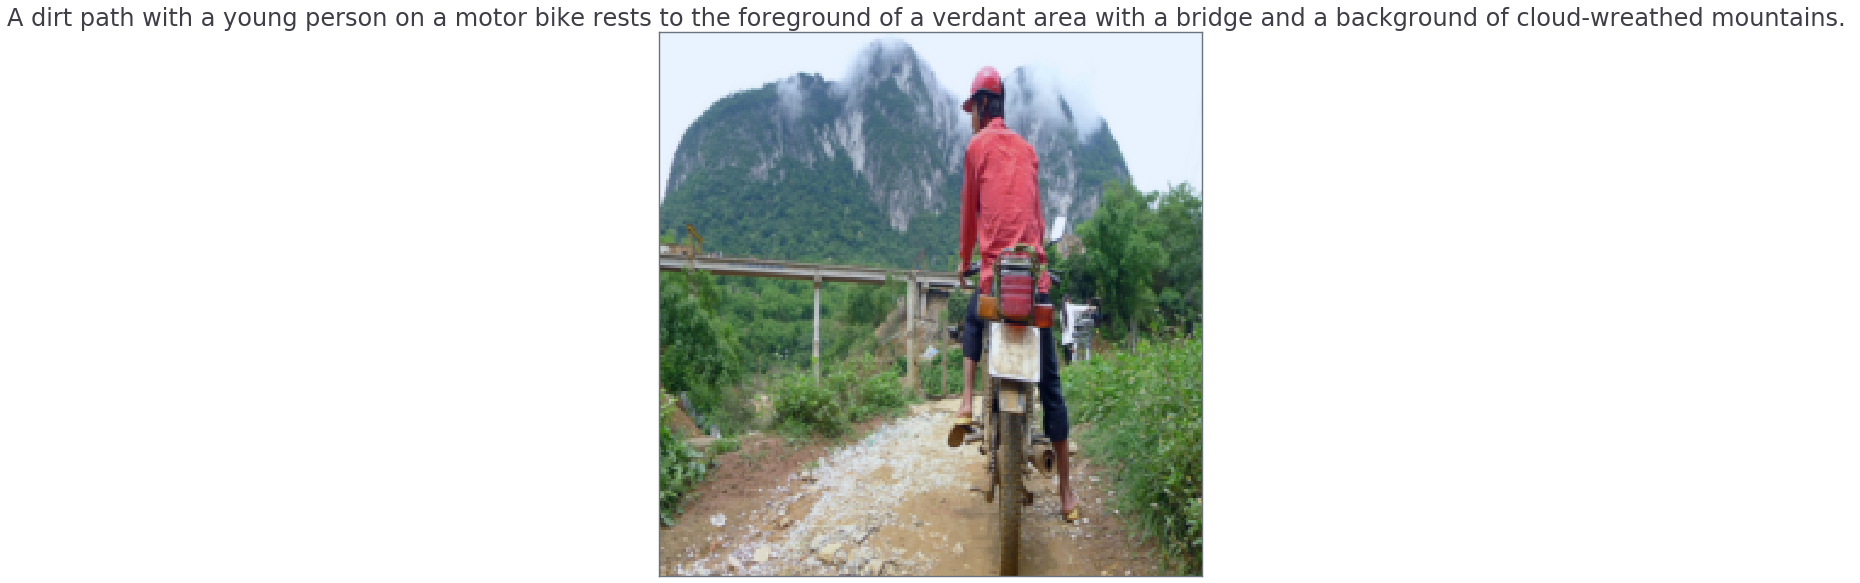

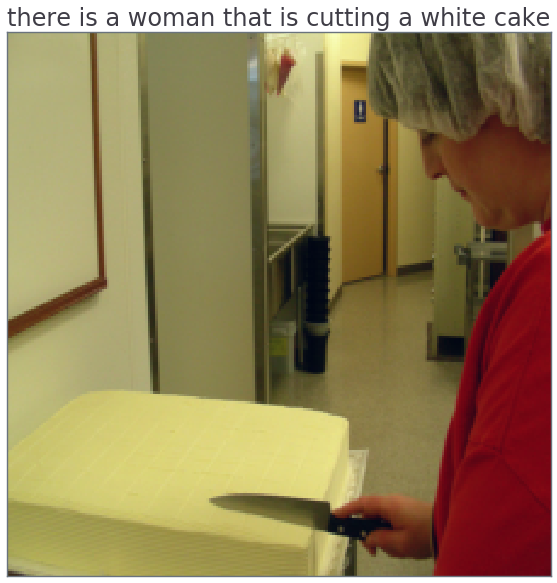

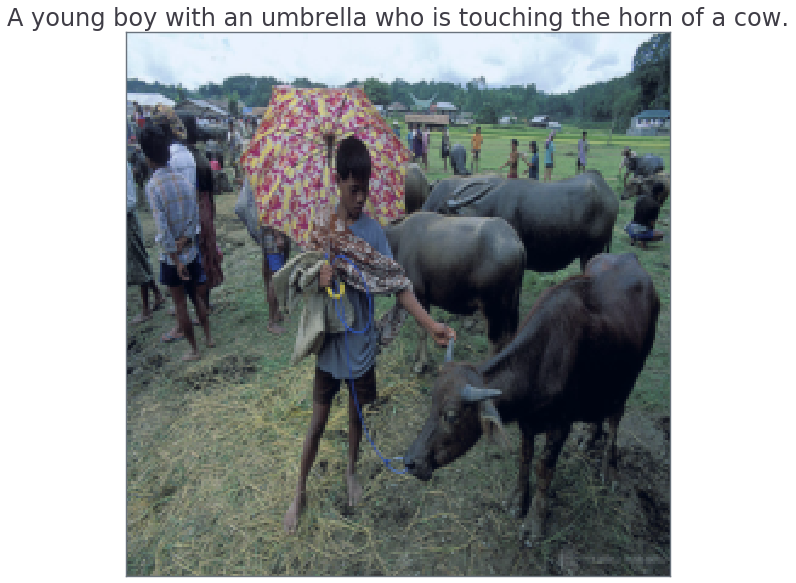

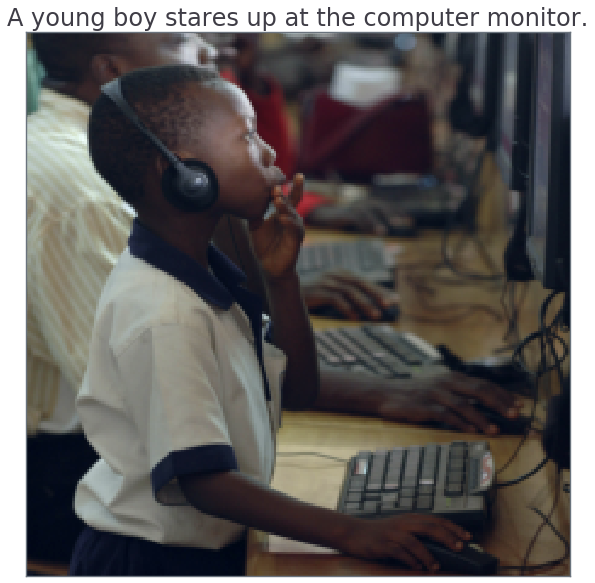

In [8]:
img, captions = next(iter(dataloader['train']))
show_coco(img[:4], captions[:4])

# Extract Features

In [9]:
extractor = Extractor(architecture)

In [ ]:
for mode in ('val', 'train'):
    with mag.eval(extractor): features = extractor(dataloader[mode])
    torch.save(features.to('cpu'), DIR_DATA / mode / 'features.pt')